In [ ]:
# t-Distributed Stochastic Neighbor Embedding
# 고차원 데이터를 2차원 또는 3차원으로 시각화할 수 있도록 차원 축소하는 "비선형" 기법
# 고차원 공간에서 가까운 데이터들이 저차원에서도 가깝게 유지되도록 설계된 알고리즘 (유사성을 계산)
# 데이터 간의 국소적인 구조(local structure)를 잘 보존
# manifold 방식 = 고차원 데이터가 실제로 더 낮은 차원의 다양체(manifold) 위에 놓여 있을 가능성이 있다고 가정하고 저차원으로 투영
# 저차원으로의 매핑에 스튜던트 t분포를 사용해서 클러스터링 효과를 극대화

# 점들의 유사도는 A를 중심으로 한 정규 분포에서 확률 밀도에 비례
# 이웃을 선택할 때 포인트 A가 포인트 B를 이웃으로 선택한다는 조건부 확률 계산
# 저차원 공간에서 데이터를 표현하기 위해 고차원 및 저차원 공간에서 조건부 확률(유사성)간의 차이를 최소화

# 원리
# 고차원에서의 유사도 계산:
# 데이터 포인트 간의 유사도를 확률로 나타냄.
# 가까운 포인트일수록 높은 확률을 가지도록 가우시안 커널 사용.

# 저차원에서의 유사도 계산:
# t-분포(t-distribution, 자유도 1)를 사용해 확률 계산.
# 이는 멀리 떨어진 점들 간의 거리 차이를 크게 만듦 (즉, 클러스터가 더 명확해짐).

# Kullback-Leibler Divergence 
# 한 확률 분포가 두 번째 예상 확률 분포와 어떻게 다른지 측정하는 지표
# gradient descent 방식을 사용하여 전체 데이터 포인트의 KL Divergence 합계를 최소화
# 고차원에서 계산한 유사도와 저차원에서 계산한 유사도의 차이를 KL Divergence로 측정.
# 이 값을 최소화하도록 저차원 임베딩을 반복적으로 업데이트.

In [ ]:
# 단점
# 해석이 어렵고 시각화용으로 주로 사용
# random 초기화로 인해, 다른 차원 축소 기법과 달리 매번 실행할 때마다 결과가 달라질 수 있음 
# t-SNE는 비지도 학습 기법으로, 새로운 데이터가 추가되면 기존 결과에 영향을 미친다.
# 새로운 데이터를 기존 시각화에 바로 넣기 어렵습니다 (비유사한 임베딩)
# 느린 속도 (→ 대용량 데이터에는 UMAP, PCA + t-SNE)

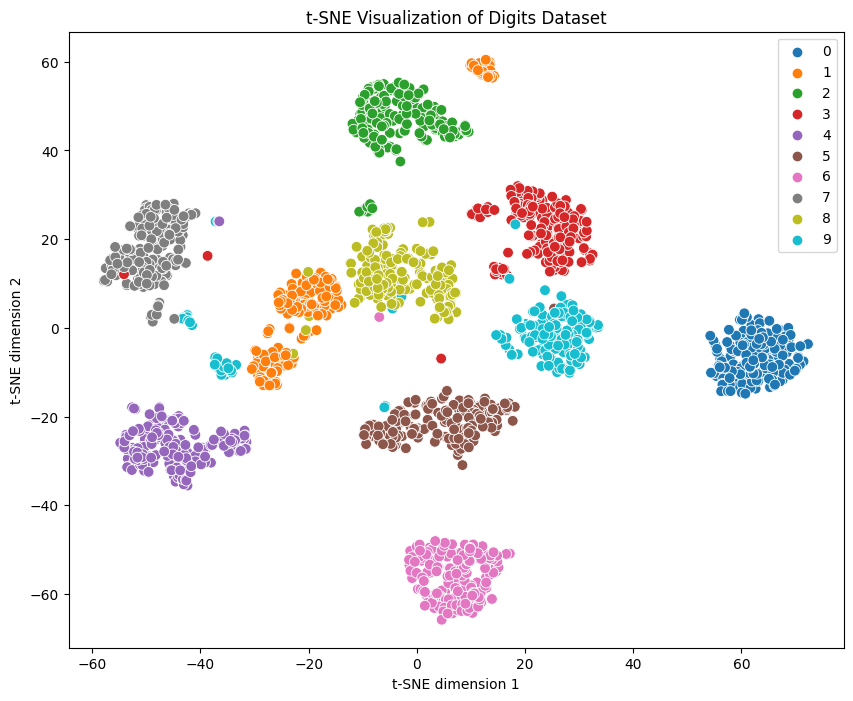

In [1]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 로드
digits = load_digits()
X = digits.data       # (1797, 64) 8x8 이미지
y = digits.target     # 숫자 레이블 (0~9)

# 2. t-SNE 적용
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

# 3. 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='tab10', legend='full', s=60)
plt.title("t-SNE Visualization of Digits Dataset")
plt.xlabel("t-SNE dimension 1")
plt.ylabel("t-SNE dimension 2")
plt.show()